<a href="https://colab.research.google.com/github/rafavidal1709/mack_ai/blob/main/ner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Voluntários
* Cesar Imai
* Rafael Vidal

# Tema
* **Identificando palavras e suas funções em textos (NER e POS Tagging)**

# Conceitos

## Esquemas de Anotação

Os esquemas de anotação são usados para marcar entidades em textos em tarefas de NER.

### BIO

Cada token é classificado como:
* B (Begin): Início de uma entidade.
* I (Inside): Parte interna de uma entidade.
* O (Outside): Token que não pertence a nenhuma entidade.

Exemplo: **"Banco do Brasil anunciou lucros em 2024."**

* **"Banco"** - B-ORG
* **"do"** - I-ORG
* **"Brasil"** - I-ORG
* **"anunciou"** - O
* **"lucros"** - O
* **"em"** - O
* **"2024"** - B-DATA
* **"."** - O

### BILOU

Cada token é classificado como:
* B (Begin): Primeiro token de uma entidade.
* I (Inside): Token interno.
* L (Last): Último token de uma entidade.
* U (Unit): Entidade com apenas um token.
* O (Outside): Token fora de qualquer entidade.

Exemplo: **"Banco do Brasil anunciou lucros em 2024"**

* **"Banco"**	B-ORG
* **"do"**	I-ORG
* **"Brasil"**	L-ORG
* **"anunciou"**	O
* **"lucros"**	O
* **"em"**	O
* **"2024"**	U-DATA
* **"."**	O

## NER (Named Entity Recognition)

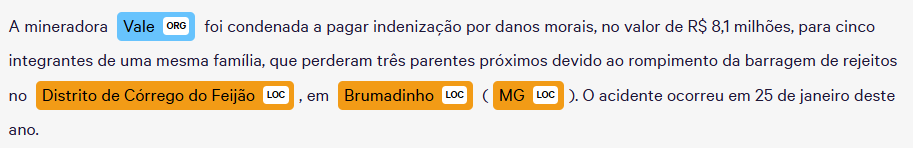

Reconhecimento de Entidades Nomeadas (NER) é uma técnica de processamento de linguagem natural (NLP) que foca em identificar e classificar entidades nomeadas em um texto. Uma entidade pode ser uma pessoa, organização, local, data ou até termos específicos.

Essa técnica tem o objetivo de estruturar informações de textos não-estruturados, dessa forma permite que essas informações sejam usadas em outras aplicações de NLP, como extração de texto, classificação de texto e análise de sentimentos.

### Processo

Exemplo de sentença: **"A Vale foi condenada a pagar R$ 1 milhão por família em Brumadinho"**.

1. Tokenização
  * O texto é dividido em tokens, que podem ser fragmentos de palavras, palavras inteiras ou conjunto de palavras.
  * Exemplo: `["A", "Vale", "foi", "condenada", "a", "pagar", "R$", "1", "milhão", "por", "família", "em", "Brumadinho"]`

2. Identificação de entidades
  * São usadas técnicas como métodos baseados em regras ou modelos estatísticos para detectar entidades.
  * Exemplo: `["Vale", "R$", "Brumadinho"]`

3. Classificação de entidades
  * As entidades identificadas são categorizadas em classes predefinidas.
  * Exemplo: `["Vale": ORGANIZAÇÃO, "R$": VALOR, "Brumadinho": LOCAL]`

4. Análise contextual
  * O sistema considera o contexto em torno da entidade para melhorar a acurácia e evitar ambiguidade.
  * Exemplo: **De acordo com o contexto foi determinado que Vale seria uma organização ao invés de um local.**

5. Pós-processamento
  * Etapa de refinamento e adição de informação contextual.
  * Exemplo: `"R$"` --->  `"R$ 1 milhão"`

### Abordagens

* Baseadas em regras
  * Abordagens baseadas em regras identificam e classificam entidades nomeadas através de padrões linguísticos, expressões regulares ou listas.

* Baseadas em modelos estatísticos
  * Abordagens estatísticas usam modelos probabilísticos como HMM (Hidden Markov Models) e CRF (Conditional Random Fields).

* Baseadas em redes neurais
  * Abordagens baseadas em redes neurais usam modelos de aprendizagem profunda, como RNNs (Recurrent Neural Networks) e Transformers.

### Desafios

* Entidades específicas
  * Termos técnicos não são reconhecidos por modelos genéricos.
  * Exemplo: "COVID-19" em textos médicos

* Ambiguidade
  * A mesma palavra pode ser uma entidade ou não, dependendo do contexto.
  * Exemplo: "Vale" → Empresa ou verbo?

* Variabilidade Linguística
  * Diferenças e nuances na forma como a linguagem é usada
  * Exemplo: "Moro na Paulista" (Avenida Paulista → LOC).

* Entidades aninhadas
  * Uma entidade pode estar dentro de outra.
  * Exemplo: "Banco do Brasil" (ORG) contém "Brasil" (LOC).

* Falta de suporte para outros idiomas
  * Embora o NER tenha feito muitos progressos para idiomas como o inglês, ele não tem o mesmo nível de precisão para muitos outros. Isso se deve frequentemente à falta de dados rotulados nesses idiomas.

## POS tagging (Part-of-Speech Tagging)

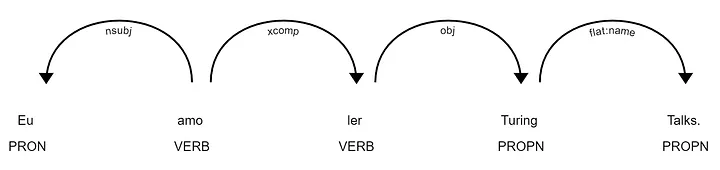

POS tagging é uma técnica de processamento de linguagem natural (NLP) que foca em atribuir categorias gramaticais (substantivo, verbo, adjetivo, etc.) a cada palavra/token.

Essa técnica tem o objetivo de analisar a estrutura sintática das frases. Dessa forma  permite que modelos compreendam a relação entre palavras, o que é essencial para tarefas como correção gramatical e tradução automática.

POS tagging é aplicado como uma etapa prévia para NER, pois auxilia em filtrar nomes próprios como possíveis entidades, enquanto verbos e artigos geralmente não são entidades. Modelos clássicos de NER usam POS tagging como atributos para decidir se um token é uma entidade.

Exemplo: "vitamina D" (NOUN + PROPN) podem ser identificados como QUÍMICO com mais precisão se o modelo souber que "D" é um nome próprio no contexto.

# Prática

In [ ]:
# Texto de exemplo
texto = """
Olá, meu nome é Rafael Vidal e meu e-mail é rafavidal1709@gmail.com, moro no Sobradinho em São Tomé das Letras.
Fale também com José Geraldo da Silva pelo e-mail jose.geraldo@imagine.com.br, ele mora no Alto do Cruzeiro.
A Maria foi ao evento com João e Ana Clara no bairro do Cantagalo. Contato: ana_clara1990@not-email.com
"""

## Dependências

In [ ]:
%pip install transformers
%pip install nltk

## Modelos Baseados em Regras

### POS TAG

In [ ]:
def pos_tagger_regras(word): # Simples, apenas um exemplo
    if word.endswith('ing'):
        return 'VBG'  # Gerúndio
    elif word.endswith('ed'):
        return 'VBD'  # Passado
    elif word[0].isupper():
        return 'NNP'  # Nome próprio
    else:
        return 'NN'   # Substantivo comum

pos_tagger_regras('Shared')

'VBD'

### NER

In [ ]:
import re
"""
Regex (Regular Expressions) é uma linguagem formal, com sua própria gramática e semântica, usada para descrever padrões de texto.
É baseada em teoria de autômatos finitos e linguagens formais — fundamentos da ciência da computação.
Tem sua sintaxe própria, expressividade, operadores lógicos, condições e quantificadores e execução de máquina de estados.
"""

def baseado_em_regras(texto):
    # Expressão regular para e-mails
    regex_email = r'\b[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}\b'

    # Nomes compostos (duas ou mais palavras com iniciais maiúsculas)
    regex_nomes = r'\b(?:[A-Z][a-zà-ú]+(?:\s+[A-Z][a-zà-ú]+)+)\b'

    # Locais com preposições (em, no, na, do, da) seguidas por nomes próprios
    regex_locais = r'(?:no|na|em|do|da)\s+(?:[A-Z][a-zà-ú]+(?:\s+(?:dos?|das?|de|[A-Z][a-zà-ú]+))*)'

    # Buscar ocorrências
    emails = re.findall(regex_email, texto)
    nomes = re.findall(regex_nomes, texto)
    locais = re.findall(regex_locais, texto)
    locais = [re.sub(r'^(no|na|em|do|da)\s+', '', local) for local in locais]

    # Resultados
    print("Emails encontrados:")
    for email in emails:
        print(f"- {email}")

    print("\nNomes próprios compostos encontrados:")
    for nome in nomes:
        print(f"- {nome}")

    print("\nLocais encontrados:")
    for local in locais:
        print(f"- {local}")

    # Anonimização
    texto_anonimo = texto
    for email in emails:
        texto_anonimo = texto_anonimo.replace(email, "[EMAIL]")
    for nome in nomes:
        texto_anonimo = texto_anonimo.replace(nome, "[NOME]")
    for loc in locais:
        texto_anonimo = re.sub(r'\b' + re.escape(loc) + r'\b', '[LOCAL]', texto_anonimo)

    print("\nTexto anonimizado:")
    print(texto_anonimo)

# Executar
baseado_em_regras(texto)

Emails encontrados:
- rafavidal1709@gmail.com
- jose.geraldo@imagine.com.br
- ana_clara1990@not-email.com

Nomes próprios compostos encontrados:
- Rafael Vidal
- São Tomé
- José Geraldo
- Ana Clara

Locais encontrados:
- Sobradinho
- São Tomé das Letras
- Silva
- Alto do Cruzeiro
- Clara
- Cantagalo

Texto anonimizado:

Olá, meu nome é [NOME] e meu e-mail é [EMAIL], moro no [LOCAL] em [NOME] das Letras.
Fale também com [NOME] da [LOCAL] pelo e-mail [EMAIL], ele mora no [LOCAL].
A Maria foi ao evento com João e [NOME] no bairro do [LOCAL]. Contato: [EMAIL]



## Modelos Probabilísticos

In [ ]:
import nltk
from nltk import word_tokenize, pos_tag, ne_chunk

# Baixar os recursos necessários
nltk.download('punkt')                          # Tokenizador
nltk.download('words')                          # Lista de palavras
nltk.download('punkt_tab')                      # Tabela extra necessária
nltk.download('averaged_perceptron_tagger_eng') # POS tagging
nltk.download('maxent_ne_chunker')              # Modelo de NER
nltk.download('maxent_ne_chunker_tab')          # Tabela extra necessária

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker_tab.zip.


True

### POS TAG

In [ ]:
# Exemplo
text = "Mr. Joaquim Heleno is going to Bahia to buy a charming berimbau for his son, Marcos."

def probabilistico_pos_tag(text): # Apenas em ingles
    """
    Técnica: Averaged Perceptron Tagger, modelo probabilístico/discriminativo, mas não neural.
    Implementado por Matthew Honnibal (o mesmo criador do spaCy).
    Modelo rápido, leve e preciso, porém não tanto como os modelos neurais spaCy e BERT.
    OBS: Não encontrei nenhum modelo para português, nem multilinguas ^^"
    """
    tokens = word_tokenize(text) # Tokenização
    tags = pos_tag(tokens, lang='eng') # Pos Tag

    print(tags)

    return tags # Deve ser passado para a próxima função

tags = probabilistico_pos_tag(text)

[('Mr.', 'NNP'), ('Joaquim', 'NNP'), ('Heleno', 'NNP'), ('is', 'VBZ'), ('going', 'VBG'), ('to', 'TO'), ('Bahia', 'NNP'), ('to', 'TO'), ('buy', 'VB'), ('a', 'DT'), ('charming', 'JJ'), ('berimbau', 'NN'), ('for', 'IN'), ('his', 'PRP$'), ('son', 'NN'), (',', ','), ('Marcos', 'NNP'), ('.', '.')]


### NER

In [ ]:
# Named Entity Chunking

def probabilistico_ner(tags):
    """
    Técnica: Named Entity Recognition com base em árvore de chunking.
    Modelo baseado em Maximum Entropy (não neural).
    """
    tree = ne_chunk(tags)

    print(tree)

    # Extrair entidades nomeadas
    entities = []
    for subtree in tree:
        if hasattr(subtree, 'label'):
            entity = " ".join(token for token, pos in subtree.leaves())
            entities.append((entity, subtree.label()))

    print("\n", entities)

probabilistico_ner(tags)

(S
  (PERSON Mr./NNP)
  (PERSON Joaquim/NNP Heleno/NNP)
  is/VBZ
  going/VBG
  to/TO
  (GPE Bahia/NNP)
  to/TO
  buy/VB
  a/DT
  charming/JJ
  berimbau/NN
  for/IN
  his/PRP$
  son/NN
  ,/,
  (PERSON Marcos/NNP)
  ./.)

 [('Mr.', 'PERSON'), ('Joaquim Heleno', 'PERSON'), ('Bahia', 'GPE'), ('Marcos', 'PERSON')]


### CURIOSIDADE

 o POS tagging é uma etapa anterior e auxiliar ao NER em praticamente todos os **modelos não-neurais**.

 Nos **modelos neurais** essas duas tarefas se tornaram independentes entre si aprendendo diretamente das palavras/tokens, sem uma passar pela outra. Ao mesmo tempo, foram englobadas dentro de Token Classification, uma subcategoria da NLP.

## Modelos de Redes Neurais

### NER

In [ ]:
from transformers import pipeline

def anonimizacao(texto, entidades, substituicoes=None):
    texto_anonimo = texto
    substituicoes = substituicoes or {}

    # Ordenar entidades da última para a primeira posição (evita conflito de índices ao substituir)
    entidades_ordenadas = sorted(entidades, key=lambda x: x['start'], reverse=True)

    for ent in entidades_ordenadas:
        start, end = ent['start'], ent['end']
        categoria = ent['entity_group']
        placeholder = substituicoes.get(categoria, f"[{categoria}]")

        # Substitui diretamente usando slicing
        texto_anonimo = texto_anonimo[:start] + placeholder + texto_anonimo[end:]

    print("\nTexto anonimizado:")
    print(texto_anonimo)

def redes_neurais_multilingua(texto):
    # Carrega pipeline de NER com modelo pré-treinado (multilíngue)
    ner = pipeline("ner", model="Davlan/bert-base-multilingual-cased-ner-hrl", grouped_entities=True)
    #ner = pipeline("ner", model="neuralmind/bert-base-portuguese-cased", grouped_entities=True) # Bertimbau

    # Aplica NER no texto
    entidades = ner(texto)

    # Imprime resultados
    print("\nEntidades encontradas:\n")
    for ent in entidades:
        print(f"{ent['word']} → {ent['entity_group']}")

    # Anonimização
    substituicoes = {
        "PER": "[NOME]",
        "LOC": "[LOCAL]",
        "ORG": "[ORG]",
        "MISC": "[OUTRO]"
    }

    anonimizacao(texto, entidades, substituicoes)

redes_neurais_multilingua(texto)

Device set to use cpu



Entidades encontradas:

Rafael Vidal → PER
Sobradinho → LOC
São Tomé das Letras → LOC
José Geraldo da Silva → PER
Alto do Cruzeiro → LOC
Maria → PER
João → PER
Ana Clara → PER
Cantagalo → LOC

Texto anonimizado:

Olá, meu nome é [NOME] e meu e-mail é rafavidal1709@gmail.com, moro no [LOCAL] em [LOCAL].
Fale também com [NOME] pelo e-mail jose.geraldo@imagine.com.br, ele mora no [LOCAL].
A [NOME] foi ao evento com [NOME] e [NOME] no bairro do [LOCAL]. Contato: ana_clara1990@not-email.com



### POS TAG

In [ ]:
from transformers import AutoTokenizer, AutoModelForTokenClassification, pipeline

def redes_neurais_multilinguas_pos_tag(texto):
    # Carregar o tokenizador e o modelo
    model_name = "jordigonzm/mdeberta-v3-base-multilingual-pos-tagger"
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForTokenClassification.from_pretrained(model_name)

    # Criar o pipeline de POS tagging
    pos_pipeline = pipeline("ner", model=model, tokenizer=tokenizer)

    # Aplicar POS tagging
    tokens = pos_pipeline(texto)

    # Exibir os resultados
    for token in tokens:
        print(f"{token['word']} → {token['entity']}")

redes_neurais_multilinguas_pos_tag(texto)

tokenizer_config.json:   0%|          | 0.00/1.48k [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/4.31M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/16.3M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/23.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/971 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.51k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

Device set to use cpu


▁Ol → NOUN
á → NOUN
, → PUNCT
▁meu → PRON
▁nome → NOUN
▁ → AUX
é → AUX
▁ → PROPN
Rafael → PROPN
▁Vida → PROPN
l → PROPN
▁ → CCONJ
e → CCONJ
▁meu → DET
▁ → NOUN
e → NOUN
- → NOUN
mail → NOUN
▁ → AUX
é → AUX
▁ → PROPN
rafa → PROPN
vida → PROPN
l → PROPN
1709 → NUM
@ → X
gmail → X
. → X
com → X
, → PUNCT
▁moro → VERB
▁no → DET
▁Sobr → PROPN
ad → PROPN
inho → PROPN
▁em → ADP
▁S → PROPN
ão → PROPN
▁Tom → PROPN
é → PROPN
▁das → ADP
▁ → PROPN
Letra → PROPN
s → PROPN
. → PUNCT
▁Fale → VERB
▁ → ADV
também → ADV
▁ → ADP
com → ADP
▁ → PROPN
José → PROPN
▁ → PROPN
Gerald → PROPN
o → PROPN
▁da → ADP
▁Silva → PROPN
▁pelo → ADP
▁ → NOUN
e → NOUN
- → NOUN
mail → NOUN
▁jose → PROPN
. → X
gerald → PROPN
o → PROPN
@ → X
imagine → PROPN
. → X
com → X
. → X
br → PROPN
, → PUNCT
▁ele → PRON
▁mora → VERB
▁no → ADP
▁Alto → PROPN
▁do → ADP
▁Cruz → PROPN
eiro → PROPN
. → PUNCT
▁A → DET
▁Maria → PROPN
▁foi → VERB
▁ → ADP
a → ADP
o → DET
▁evento → NOUN
▁ → ADP
com → ADP
▁Jo → PROPN
ão → PROPN
▁ → CCONJ
e → CCONJ


### Como encontro modelos?

O Transformers faz download de seus modelos da núvem diretamente da plataforma da HuggingFace.

Encontre o modelo desejado, **atenção que deve ser um modelo para NER**, neste caso, no site oficial:

https://huggingface.co/models

Pesquise por "NER" diretamente na barra de busca, ou clique em "Token Classification" no menu lateral dentro de "Natural Language Processing".

**Agora, vamos testar um dos modelos mais populares para português**

In [ ]:
def redes_neurais_portugues(texto):
    # Carrega pipeline de NER com modelo pré-treinado (português)
    ner = pipeline("ner", model="lfcc/bert-portuguese-ner", grouped_entities=True)

    # Aplica NER no texto
    entidades = ner(texto)

    # Imprime resultados
    print("\nEntidades encontradas:\n")
    for ent in entidades:
        print(f"{ent['word']} → {ent['entity_group']}")

    # Anonimização
    anonimizacao(texto, entidades)

redes_neurais_portugues(texto)

config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/433M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/544 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/210k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/438k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/433M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.



Entidades encontradas:

Rafael Vidal → Pessoa
ra → Pessoa
##fa → Pessoa
##vida → Pessoa
##l1709 → Pessoa
Sob → Local
##rad → Local
##inho → Local
São Tomé das Letras → Local
José Geraldo da Silva → Pessoa
jo → Pessoa
##se. geraldo → Pessoa
Alto do Cruzeiro → Local
Maria → Pessoa
João → Pessoa
Ana Clara → Pessoa
Canta → Local
##galo → Local
ana _ clara1990 → Pessoa

Texto anonimizado:

Olá, meu nome é [Pessoa] e meu e-mail é [Pessoa][Pessoa][Pessoa][Pessoa]@gmail.com, moro no [Local][Local][Local] em [Local].
Fale também com [Pessoa] pelo e-mail [Pessoa][Pessoa]@imagine.com.br, ele mora no [Local].
A [Pessoa] foi ao evento com [Pessoa] e [Pessoa] no bairro do [Local][Local]. Contato: [Pessoa]@not-email.com



## 🔽 **SUA VEZ** 🔽

In [ ]:
seu_texto = """
DIGITE SEU TEXTO
"""

print("BASEADO EM REGRAS:\n")
baseado_em_regras(seu_texto)
print("\n\nREDES NEURAIS MULTILINGUAS:\n")
redes_neurais_multilingua(seu_texto)
print("\n\nREDES NEURAIS PORTUGUES:\n")
redes_neurais_portugues(seu_texto)

print("\n\n\nPOS TAG MULTILINGUAS:\n")
redes_neurais_multilinguas_pos_tag(seu_texto)

**E os modelos probabilísticos?**

Lembre que só suporta inglês...

In [ ]:
your_text = """
YOUR TEXT HERE
"""

print("MODELO PROBABILÍSTICO NLTK - POS TAG:\n")
tag = probabilistico_pos_tag(your_text)
print("\n\nMODELO PROBABILÍSTICO NLTK - NER:\n")
probabilistico_ner(tag)

# Referências

https://www.geeksforgeeks.org/named-entity-recognition/

https://www.datacamp.com/blog/what-is-named-entity-recognition-ner

https://www.ibm.com/br-pt/think/topics/named-entity-recognition

https://demos.explosion.ai/displacy-ent

https://medium.com/turing-talks/pos-tagging-da-teoria-%C3%A0-implementa%C3%A7%C3%A3o-eafa59c9d115

https://natural-language-understanding.fandom.com/wiki/Named_entity_recognition

https://docs.python.org/3/library/re.html

https://www.nltk.org/

https://huggingface.co/docs/transformers/index